# EDA

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset 
unicorn_data = pd.read_csv("C:\\Users\\user\\Desktop\\unicon startup companies\\unicorn_startup_companies.csv")
unicorn_data.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
#rows and columns of the dataset
unicorn_data.shape

(1221, 8)

In [6]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1221 non-null   int64 
 1   Company           1221 non-null   object
 2   Valuation ($B)    1221 non-null   object
 3   Date Joined       1221 non-null   object
 4   Country           1221 non-null   object
 5   City              1203 non-null   object
 6   Industry          1221 non-null   object
 7   Select Investors  1219 non-null   object
dtypes: int64(1), object(7)
memory usage: 76.4+ KB


In [7]:
#displaying unique rows
unicorn_data['Company'].nunique()

1216

In [8]:
unicorn_data['Date Joined'].nunique()

735

In [9]:
unicorn_data.nunique()

Unnamed: 0          1221
Company             1216
Valuation ($B)       226
Date Joined          735
Country               51
City                 289
Industry               7
Select Investors    1200
dtype: int64

In [10]:
#removing unwanted columns
unicorn_data = unicorn_data.drop(['Unnamed: 0', 'Select Investors'], axis=1)
unicorn_data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials
2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services
4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech


In [11]:
#converting Datetime object
unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1221 non-null   object        
 1   Valuation ($B)  1221 non-null   object        
 2   Date Joined     1221 non-null   datetime64[ns]
 3   Country         1221 non-null   object        
 4   City            1203 non-null   object        
 5   Industry        1221 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 57.4+ KB


In [13]:
unicorn_data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry
0,ByteDance,$225,2017-04-07,China,Beijing,Media & Entertainment
1,SpaceX,$137,2012-12-01,United States,Hawthorne,Industrials
2,SHEIN,$66,2018-07-03,China,Shenzhen,Consumer & Retail
3,Stripe,$50,2014-01-23,United States,San Francisco,Financial Services
4,Canva,$40,2018-01-08,Australia,Surry Hills,Enterprise Tech


In [15]:
unicorn_data.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City              18
Industry           0
dtype: int64

In [17]:
  # Dropping the missing values.
unicorn_data = unicorn_data.dropna()  
unicorn_data.count()

Company           1203
Valuation ($B)    1203
Date Joined       1203
Country           1203
City              1203
Industry          1203
dtype: int64

In [22]:
#checking for duplicating rows
duplicate_rows_unicorn_data = unicorn_data[unicorn_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_unicorn_data.shape)

number of duplicate rows:  (0, 6)


In [24]:
countryGrouped = unicorn_data.groupby(['Country'])
countryGrouped['Company'].count().sort_values(ascending=False)

Country
United States           656
China                   173
India                    70
United Kingdom           52
Germany                  30
France                   25
Israel                   24
Canada                   21
Brazil                   16
South Korea              14
Australia                 8
Indonesia                 8
Mexico                    8
Sweden                    7
Japan                     7
Netherlands               7
Ireland                   6
Switzerland               6
Spain                     5
Hong Kong                 4
Finland                   4
Norway                    4
Thailand                  3
Turkey                    3
Colombia                  3
United Arab Emirates      3
Belgium                   3
South Africa              2
Italy                     2
Vietnam                   2
Estonia                   2
Austria                   2
Lithuania                 2
Chile                     2
Croatia                   2
Denmark     

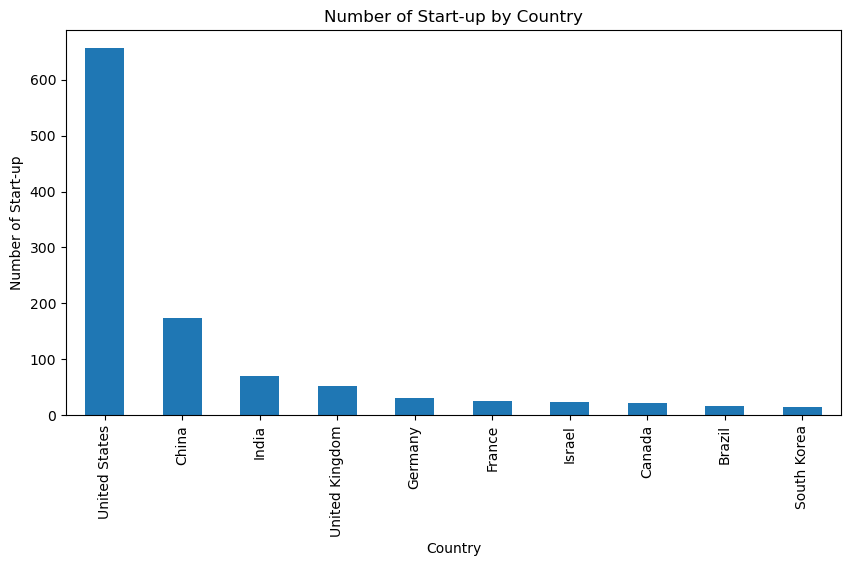

In [26]:
#visualizing the number of startups by country
unicorn_data['Country'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Start-up by Country")
plt.ylabel('Number of Start-up')
plt.xlabel('Country');


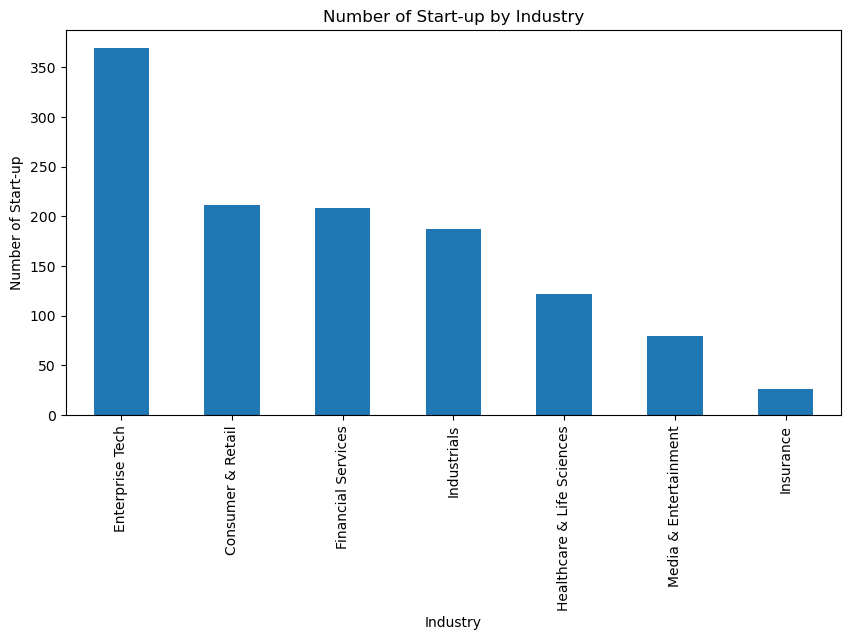

In [27]:
#visualizing number of startups by industry
unicorn_data['Industry'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Start-up by Industry")
plt.ylabel('Number of Start-up')
plt.xlabel('Industry');